In [1]:
# استدعاء المكتبات
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# سحب البيانات 
data = pd.read_csv("data/uber-raw-data-sep14.csv")

# التعديل على صيغة التاريخ من شهر/يوم/سنة إلى يوم-شهر-سنة
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764


In [2]:
# إنشاء أعمدة جديدة خاصة بمعلومات الرحلة 
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)

# أخذ عينات عشوائية
data.sample(5)

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
695728,2014-09-07 14:02:00,40.7472,-73.9564,B02682,7,6,14
1001790,2014-09-27 15:45:00,40.7337,-73.9898,B02764,27,5,15
853059,2014-09-02 05:17:00,40.7677,-73.9928,B02764,2,1,5
1014621,2014-09-29 05:51:00,40.7452,-73.9443,B02764,29,0,5
11547,2014-09-09 22:44:00,40.7419,-74.0039,B02512,9,1,22


In [3]:
# استبدال الصيغة الرقمية لأيام الأسبوع إلى صيغة كتابية
data["Weekday"] = data["Weekday"].replace([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
data.sample(7)

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
816450,2014-09-25 15:42:00,40.7097,-74.0094,B02682,25,Thursday,15
218291,2014-09-23 13:53:00,40.7677,-73.9642,B02598,23,Tuesday,13
264080,2014-09-29 14:16:00,40.7245,-74.0018,B02598,29,Monday,14
576009,2014-09-24 16:07:00,40.7588,-73.9727,B02617,24,Wednesday,16
207319,2014-09-21 17:42:00,40.6757,-73.9765,B02598,21,Sunday,17
515357,2014-09-19 12:23:00,40.7256,-73.9969,B02617,19,Friday,12
148344,2014-09-14 17:12:00,40.7757,-73.9788,B02598,14,Sunday,17


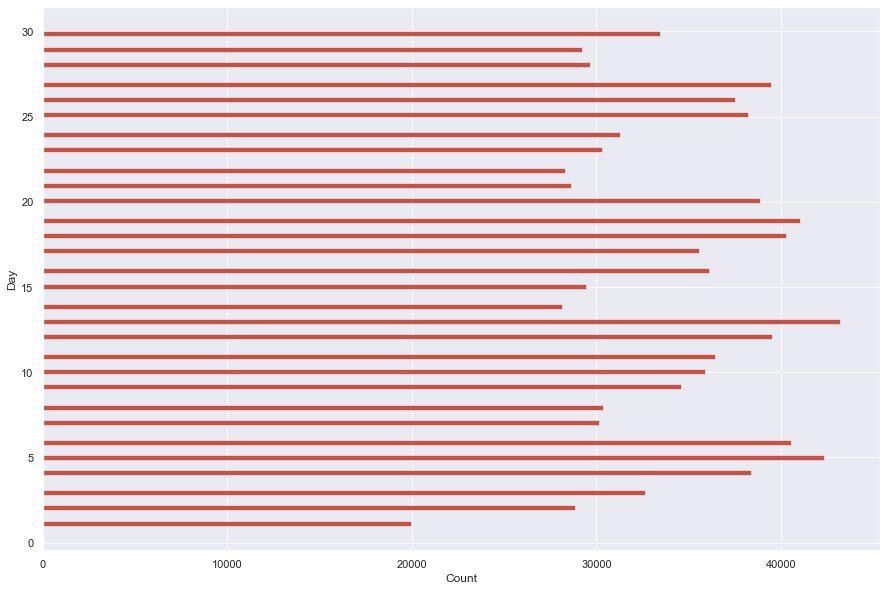

In [47]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.histplot(y = data["Day"], color='#b5200d')

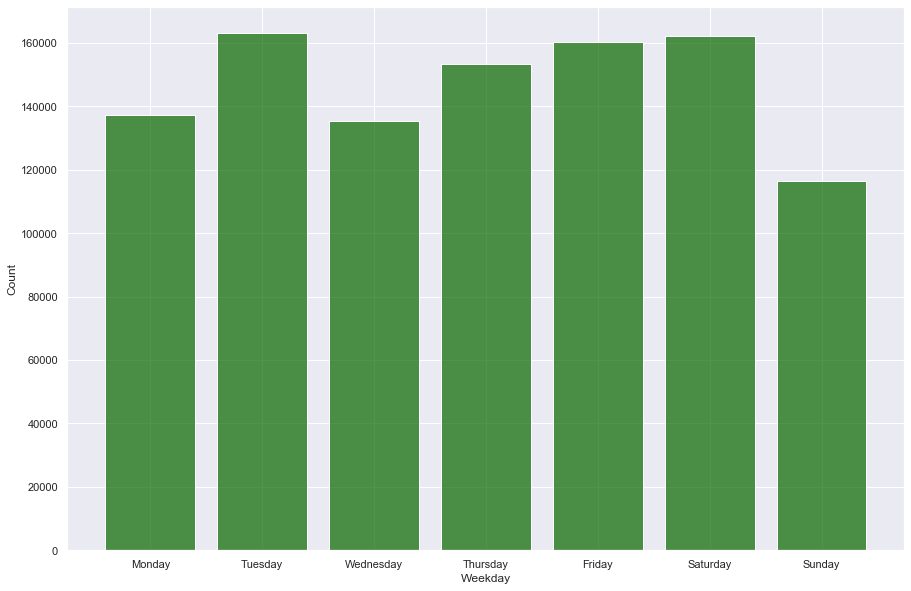

In [42]:
sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(data["Weekday"], shrink=.8, color='#15700b')

c:\users\mohamad\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


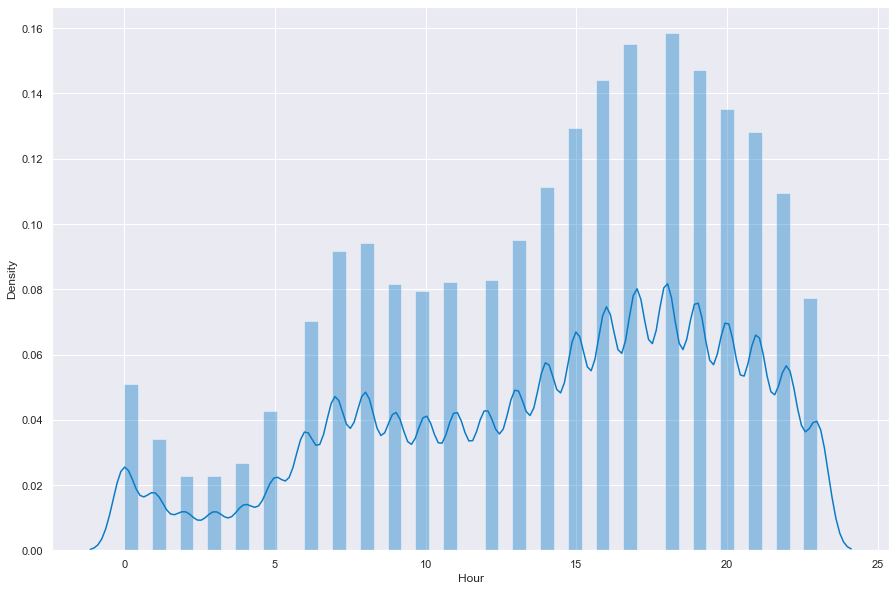

In [54]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data["Hour"], color="#0a7bc7")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


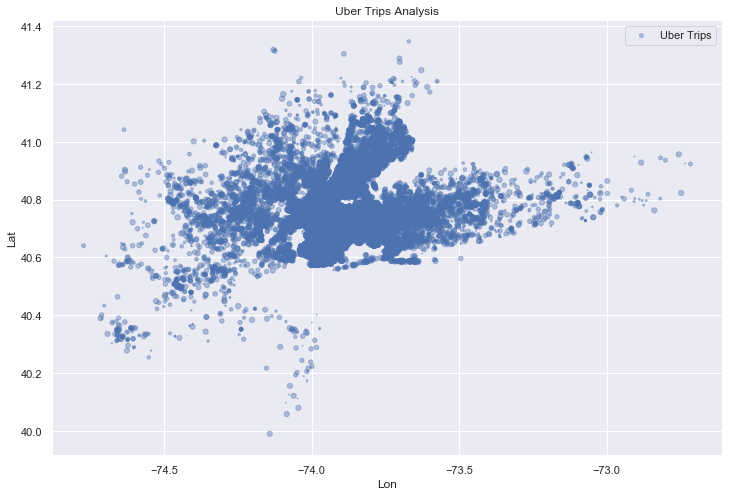

In [58]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()